In [1]:
# utilizado quando da criação do notebook, para recarregar os arquivos externos automaticamente

%load_ext autoreload
%autoreload 2

# Importando módulos e arquivo de dados

In [2]:
import input_data as inpdt  # arquivo de funções criadas para tratar os dados
import plots  # arquivo de funções criadas para plotar os dados
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file_path = "dados_brutos/notas_2019_nivel3_limpo.csv"

In [4]:
df = inpdt.input_data(file_path)
df.head()

,ALUNO,TURMA,Acertos parte A,Q17,Q18
0,bW7mLS2P,PMQ351,10.0,0.0,10.0
1,OhmUmkPK,QM161,10.0,0.0,5.0
2,IQQzr1i9,QM161,9.0,0.0,5.0
3,HqKSZosK,MAM261,7.0,0.0,10.0
4,iZ3OOR1S,QM161,9.0,0.0,0.0


# Tratando os dados de entrada

## Removendo alunos faltosos

In [7]:
df_presentes = inpdt.no_absents(df)
df_presentes

,ALUNO,TURMA,Acertos parte A,Q17,Q18
0,bW7mLS2P,PMQ351,10.0,0.0,10.0
1,OhmUmkPK,QM161,10.0,0.0,5.0
2,IQQzr1i9,QM161,9.0,0.0,5.0
3,HqKSZosK,MAM261,7.0,0.0,10.0
4,iZ3OOR1S,QM161,9.0,0.0,0.0
5,QmG9nZwy,QM161,6.0,5.0,5.0
6,XoqTMy2g,QM161,7.0,0.0,5.0
7,7snGfrYm,QM161,8.0,0.0,0.0
8,FoKsugVV,AM261,8.0,0.0,0.0
9,ZBziEYTT,QM161,8.0,0.0,0.0


In [6]:
df_presentes.describe()

,Acertos parte A,Q17,Q18
count,23.000000,23.000000,23.000000
mean,6.652174,0.521739,2.391304
std,2.036233,1.473079,3.652386
min,2.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000
75%,8.000000,0.000000,5.000000
max,10.000000,5.000000,10.000000


**Atenção**

Todos os alunos de 7º e 8º períodos dos cursos integrados faltaram!

Apenas um aluno de PMQ se inscreveu. Compareceu e tirou o primeiro lugar...

## Calculando as notas, organizando e describe

In [8]:
df_pontos = inpdt.grades(df_presentes)
df_pontos

,ALUNO,TURMA,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
0,bW7mLS2P,PMQ351,10.0,0.0,10.0,50.0,10.0,60.0
1,OhmUmkPK,QM161,10.0,0.0,5.0,50.0,5.0,55.0
2,IQQzr1i9,QM161,9.0,0.0,5.0,45.0,5.0,50.0
3,HqKSZosK,MAM261,7.0,0.0,10.0,35.0,10.0,45.0
4,iZ3OOR1S,QM161,9.0,0.0,0.0,45.0,0.0,45.0
5,QmG9nZwy,QM161,6.0,5.0,5.0,30.0,10.0,40.0
6,XoqTMy2g,QM161,7.0,0.0,5.0,35.0,5.0,40.0
7,7snGfrYm,QM161,8.0,0.0,0.0,40.0,0.0,40.0
8,FoKsugVV,AM261,8.0,0.0,0.0,40.0,0.0,40.0
9,ZBziEYTT,QM161,8.0,0.0,0.0,40.0,0.0,40.0



**Aplicando o critério de desempate**


In [9]:
df_prem_nivel3 = inpdt.awards(df_pontos, 23)
df_prem_nivel3

,ALUNO,TURMA,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
1,bW7mLS2P,PMQ351,10.0,0.0,10.0,50.0,10.0,60.0
2,OhmUmkPK,QM161,10.0,0.0,5.0,50.0,5.0,55.0
3,IQQzr1i9,QM161,9.0,0.0,5.0,45.0,5.0,50.0
4,HqKSZosK,MAM261,7.0,0.0,10.0,35.0,10.0,45.0
5,iZ3OOR1S,QM161,9.0,0.0,0.0,45.0,0.0,45.0
6,QmG9nZwy,QM161,6.0,5.0,5.0,30.0,10.0,40.0
7,XoqTMy2g,QM161,7.0,0.0,5.0,35.0,5.0,40.0
8,7snGfrYm,QM161,8.0,0.0,0.0,40.0,0.0,40.0
9,FoKsugVV,AM261,8.0,0.0,0.0,40.0,0.0,40.0
10,ZBziEYTT,QM161,8.0,0.0,0.0,40.0,0.0,40.0


**Exportando os dados do nível 3 para posterior comparação com os demais níveis**

In [10]:
df_prem_nivel3.to_csv('nivel3python.csv')


**Vendo a nota de corte para entrar nas menções honrosas**


Nesse nível, pelas baixas notas, foram premiados apenas os 5 primeiros

In [11]:
df_prem_nivel3['Pontuação final'].head(5).min()

45.0


**Verificar quantos alunos não zeraram a prova discursiva**


In [12]:
# alunos que não zeraram a prova discursiva. Comparar com ano passado.

df_prem_nivel3['ALUNO'][df_prem_nivel3['Pontos - Discursiva'] != 0].count()

9

**Describe**

In [13]:
df_prem_nivel3.describe()

,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,6.652174,0.521739,2.391304,33.260870,2.913043,36.173913
std,2.036233,1.473079,3.652386,10.181165,4.122147,11.376420
min,2.000000,0.000000,0.000000,10.000000,0.000000,10.000000
25%,5.000000,0.000000,0.000000,25.000000,0.000000,30.000000
50%,7.000000,0.000000,0.000000,35.000000,0.000000,40.000000
75%,8.000000,0.000000,5.000000,40.000000,5.000000,40.000000
max,10.000000,5.000000,10.000000,50.000000,12.000000,60.000000


# Gráficos

## Histograma e boxplot

In [14]:
bins_nivel3 = inpdt.bins(df_prem_nivel3)
bins_nivel3

,Contagem,Contagem /%,Contagem cumulativa,Contagem /% cumulativa
Intervalos,,,,
"[0, 10)",0,0.00,0,0.00
"[10, 20)",1,4.35,1,4.35
"[20, 30)",4,17.39,5,21.74
"[30, 40)",6,26.09,11,47.83
"[40, 50)",9,39.13,20,86.96
"[50, 60)",2,8.70,22,95.66
"[60, 70)",1,4.35,23,100.01
"[70, 80)",0,0.00,23,100.01
"[80, 90)",0,0.00,23,100.01


In [15]:
inpdt.latex(bins_nivel3)

\begin{tabular}{lrrrr}
\toprule
{} &  Contagem &  Contagem /\% &  Contagem cumulativa &  Contagem /\% cumulativa \\
Intervalos &           &              &                      &                         \\
\midrule
[0, 10)    &         0 &         0.00 &                    0 &                    0.00 \\
[10, 20)   &         1 &         4.35 &                    1 &                    4.35 \\
[20, 30)   &         4 &        17.39 &                    5 &                   21.74 \\
[30, 40)   &         6 &        26.09 &                   11 &                   47.83 \\
[40, 50)   &         9 &        39.13 &                   20 &                   86.96 \\
[50, 60)   &         2 &         8.70 &                   22 &                   95.66 \\
[60, 70)   &         1 &         4.35 &                   23 &                  100.01 \\
[70, 80)   &         0 &         0.00 &                   23 &                  100.01 \\
[80, 90)   &         0 &         0.00 &                   23 &   

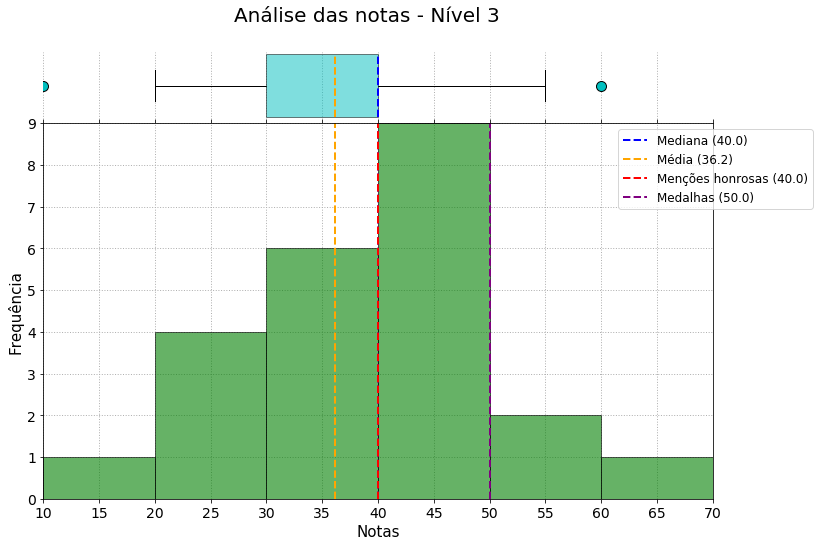

In [17]:
fig1, (ax2, ax1) = plt.subplots(figsize=(12, 8),
                                nrows=2,
                                sharex=True,
                                gridspec_kw={
                                    "height_ratios": (.15, .85),
                                    'hspace': 0.02
                                })

fig1.subplots_adjust(top=0.90)
fig1.suptitle('Análise das notas - Nível 3', fontsize=20)

plots.boxplot(df_prem_nivel3, 'Pontuação final', ax=ax2)
plots.histogram(df_prem_nivel3, 'Pontuação final', ax=ax1)

figname = 'images/hist_nivel3'
fig1.savefig(figname, bbox_inches='tight', dpi=300)

## Alunos por turma

In [18]:
turmas_nivel3 = inpdt.pivot_tables(df_prem_nivel3, 'ALUNO', 'TURMA', None)
turmas_nivel3

,ALUNO
TURMA,
AM261,1
FM161,3
MAM261,1
PMQ351,1
QM161,17
Total,23


In [19]:
turmas_nivel3.T

TURMA,AM261,FM161,MAM261,PMQ351,QM161,Total
ALUNO,1,3,1,1,17,23


In [20]:
inpdt.latex(turmas_nivel3.T)

\begin{tabular}{lrrrrrr}
\toprule
TURMA &  AM261 &  FM161 &  MAM261 &  PMQ351 &  QM161 &  Total \\
\midrule
ALUNO &      1 &      3 &       1 &       1 &     17 &     23 \\
\bottomrule
\end{tabular}



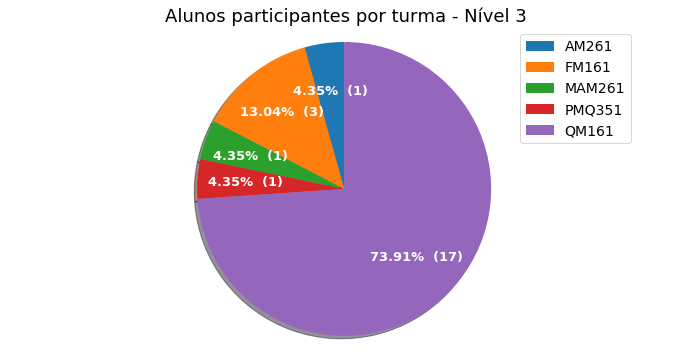

In [21]:
fig2, axarr = plt.subplots(nrows=1, ncols=1, figsize=(12,6), facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_data(turmas_nivel3, 0)
labels = inpdt.pivot_index(turmas_nivel3)

plots.plot_pizza(values, labels, 'Alunos participantes por turma - Nível 3', ax=axarr)

figname = 'images/turmas_nivel3'
fig2.savefig(figname, bbox_inches='tight', dpi=300)

## Organizando a tabela de resumo estatístico

In [22]:
df_prem_nivel3.describe()

,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,6.652174,0.521739,2.391304,33.260870,2.913043,36.173913
std,2.036233,1.473079,3.652386,10.181165,4.122147,11.376420
min,2.000000,0.000000,0.000000,10.000000,0.000000,10.000000
25%,5.000000,0.000000,0.000000,25.000000,0.000000,30.000000
50%,7.000000,0.000000,0.000000,35.000000,0.000000,40.000000
75%,8.000000,0.000000,5.000000,40.000000,5.000000,40.000000
max,10.000000,5.000000,10.000000,50.000000,12.000000,60.000000


In [23]:
stats_nivel3 = inpdt.stats_table(df_prem_nivel3.describe())
stats_nivel3

,mean,std,min,25%,50%,75%,max,IQR
Pontos - Objetiva,33.26,10.18,10.0,25.0,35.0,40.0,50.0,15.0
Q17,0.52,1.47,0.0,0.0,0.0,0.0,5.0,0.0
Q18,2.39,3.65,0.0,0.0,0.0,5.0,10.0,5.0
Pontos - Discursiva,2.91,4.12,0.0,0.0,0.0,5.0,12.0,5.0
Pontuação final,36.17,11.38,10.0,30.0,40.0,40.0,60.0,10.0


In [24]:
inpdt.latex(stats_nivel3)

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   mean &    std &   min &   25\% &   50\% &   75\% &   max &   IQR \\
\midrule
Pontos - Objetiva   &  33.26 &  10.18 &  10.0 &  25.0 &  35.0 &  40.0 &  50.0 &  15.0 \\
Q17                 &   0.52 &   1.47 &   0.0 &   0.0 &   0.0 &   0.0 &   5.0 &   0.0 \\
Q18                 &   2.39 &   3.65 &   0.0 &   0.0 &   0.0 &   5.0 &  10.0 &   5.0 \\
Pontos - Discursiva &   2.91 &   4.12 &   0.0 &   0.0 &   0.0 &   5.0 &  12.0 &   5.0 \\
Pontuação final     &  36.17 &  11.38 &  10.0 &  30.0 &  40.0 &  40.0 &  60.0 &  10.0 \\
\bottomrule
\end{tabular}



## Análise de semestre e turno dos premiados

In [25]:
df_10_nivel3 = df_prem_nivel3.head(5)
df_10_nivel3

,ALUNO,TURMA,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final
1,bW7mLS2P,PMQ351,10.0,0.0,10.0,50.0,10.0,60.0
2,OhmUmkPK,QM161,10.0,0.0,5.0,50.0,5.0,55.0
3,IQQzr1i9,QM161,9.0,0.0,5.0,45.0,5.0,50.0
4,HqKSZosK,MAM261,7.0,0.0,10.0,35.0,10.0,45.0
5,iZ3OOR1S,QM161,9.0,0.0,0.0,45.0,0.0,45.0


In [27]:
df_10_nivel3 = inpdt.semester_shift(df_10_nivel3)
df_10_nivel3

,ALUNO,TURMA,Acertos parte A,Q17,Q18,Pontos - Objetiva,Pontos - Discursiva,Pontuação final,cod,num,Período,Turno
1,bW7mLS2P,PMQ351,10.0,0.0,10.0,50.0,10.0,60.0,PMQ,351,5º período,Noite
2,OhmUmkPK,QM161,10.0,0.0,5.0,50.0,5.0,55.0,QM,161,6º período,Manhã
3,IQQzr1i9,QM161,9.0,0.0,5.0,45.0,5.0,50.0,QM,161,6º período,Manhã
4,HqKSZosK,MAM261,7.0,0.0,10.0,35.0,10.0,45.0,MAM,261,6º período,Tarde
5,iZ3OOR1S,QM161,9.0,0.0,0.0,45.0,0.0,45.0,QM,161,6º período,Manhã


In [28]:
per_10_nivel3 = inpdt.pivot_tables(df_10_nivel3, 'ALUNO', 'Período', None)
per_10_nivel3

,ALUNO
Período,
5º período,1
6º período,4
Total,5


In [29]:
inpdt.latex(per_10_nivel3)

\begin{tabular}{lr}
\toprule
{} &  ALUNO \\
Período    &        \\
\midrule
5º período &      1 \\
6º período &      4 \\
Total      &      5 \\
\bottomrule
\end{tabular}



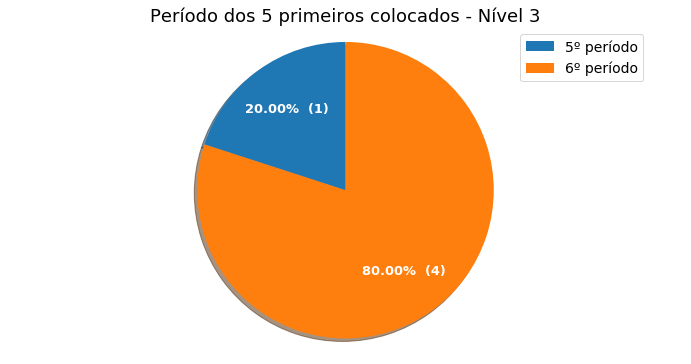

In [30]:
fig3, axarr = plt.subplots(nrows=1, ncols=1, figsize=(12,6), facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_data(per_10_nivel3, 0)
labels = inpdt.pivot_index(per_10_nivel3)

plots.plot_pizza(values, labels, 'Período dos 5 primeiros colocados - Nível 3', ax=axarr)

figname = 'images/per_10_nivel3'
fig3.savefig(figname, bbox_inches='tight', dpi=300)

In [31]:
curso_10_nivel3 = inpdt.pivot_tables(df_10_nivel3, 'ALUNO', 'cod', None)
curso_10_nivel3

,ALUNO
cod,
MAM,1
PMQ,1
QM,3
Total,5


In [32]:
inpdt.latex(curso_10_nivel3)

\begin{tabular}{lr}
\toprule
{} &  ALUNO \\
cod   &        \\
\midrule
MAM   &      1 \\
PMQ   &      1 \\
QM    &      3 \\
Total &      5 \\
\bottomrule
\end{tabular}



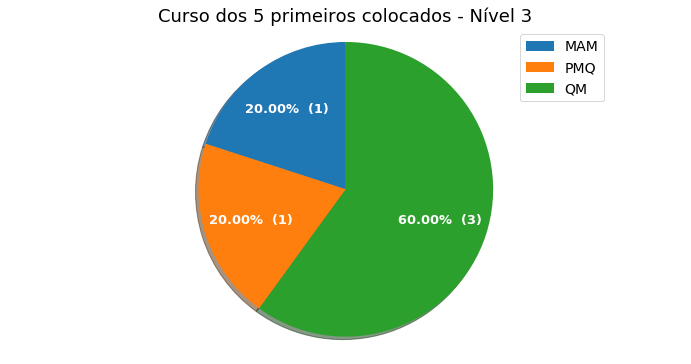

In [33]:
fig4, axarr = plt.subplots(nrows=1,
                           ncols=1,
                           figsize=(12, 6),
                           facecolor=(1.0, 1.0, 1.0))

values = inpdt.pivot_data(curso_10_nivel3, 0)
labels = inpdt.pivot_index(curso_10_nivel3)

plots.plot_pizza(values,
                 labels,
                 'Curso dos 5 primeiros colocados - Nível 3',
                 ax=axarr)

figname = 'images/curso_10_nivel3'
fig4.savefig(figname, bbox_inches='tight', dpi=300)